In [1]:
!pip install praw pandas tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 6.7 MB/s eta 0:00:00


In [2]:
import praw
import pandas as pd
from tqdm import tqdm
import praw
import requests
from prawcore import Requestor

In [3]:
session = requests.Session()
adapter = requests.adapters.HTTPAdapter(max_retries=3)
session.mount("https://", adapter)

# Creare obiect Requestor
requestor = Requestor("DetectorBurnoutScraper/0.1", session=session)

In [4]:
# Datele mele
reddit = praw.Reddit(
    client_id="4Vwnf3td80XT9dDxzOOOYw",
    client_secret="DnM81QXJZJuwT9O3Ck_KFaMwqk7kmw",
    user_agent="DetectorBurnoutScraper/0.1"
)

In [5]:
# def scrape_subreddit(subreddit_name, limit=500):
#     subreddit = reddit.subreddit(subreddit_name)
#     posts = []
#     for post in tqdm(subreddit.hot(limit=limit), desc=f"Scraping r/{subreddit_name}"):
#         if not post.stickied:
#             posts.append({
#                 'title': post.title,
#                 'selftext': post.selftext,
#                 'score': post.score,
#                 'subreddit': subreddit_name,
#                 'num_comments': post.num_comments
#             })
#     return posts


def scrape_subreddit(subreddit_name, limit_per_sort=1000):
    subreddit = reddit.subreddit(subreddit_name)
    posts = []

    for sort_type in ['hot', 'new', 'top']:
        print(f"Scraping r/{subreddit_name} - sort: {sort_type}")
        if sort_type == 'hot':
            submissions = subreddit.hot(limit=limit_per_sort)
        elif sort_type == 'new':
            submissions = subreddit.new(limit=limit_per_sort)
        elif sort_type == 'top':
            submissions = subreddit.top(limit=limit_per_sort, time_filter='all')

        for post in tqdm(submissions, desc=f"r/{subreddit_name} ({sort_type})"):
            if not post.stickied:
                posts.append({
                    'title': post.title,
                    'selftext': post.selftext,
                    'score': post.score,
                    'subreddit': subreddit_name,
                    'num_comments': post.num_comments
                })

    return posts


In [6]:
subreddits = ["burnout", "overemployed", "jobs", "depression", "workreform", "mentalhealth"]  # , "antiwork"

# all_posts = []
# for sub in subreddits:
#     posts = scrape_subreddit(sub, limit=10000)
#     all_posts.extend(posts)

# # Convertim în DataFrame
# df = pd.DataFrame(all_posts)


all_posts = []
for sub in subreddits:
    posts = scrape_subreddit(subreddit_name=sub, limit_per_sort=1000)  # 3 x 1000 pe subredit
    all_posts.extend(posts)

# Ne cream df
df = pd.DataFrame(all_posts)

# Eliminam duplicate
df.drop_duplicates(subset=['title', 'selftext'], inplace=True)

print("\nPostări per subreddit:")
for sub in subreddits:
    count = len(df[df['subreddit'] == sub])
    print(f"{sub.capitalize()}: {count}")

print("-" * 60)
print(f"TOTAL POSTĂRI (după curățare): {len(df)}")


Scraping r/burnout - sort: hot


r/burnout (hot): 0it [00:00, ?it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

r/burnout (hot): 1it [00:01,  1.28s/it]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

r/burnout (hot): 103it [00:02, 51.33it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environment

Scraping r/burnout - sort: new


r/burnout (new): 0it [00:00, ?it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

r/burnout (new): 1it [00:01,  1.06s/it]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

r/burnout (new): 101it [00:02, 53.94it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environment

Scraping r/burnout - sort: top


r/burnout (top): 0it [00:00, ?it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

r/burnout (top): 1it [00:01,  1.41s/it]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

r/burnout (top): 101it [00:02, 41.00it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environment

Scraping r/overemployed - sort: hot


r/overemployed (hot): 0it [00:00, ?it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

r/overemployed (hot): 1it [00:00,  1.11it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

r/overemployed (hot): 103it [00:01, 62.79it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchron

Scraping r/overemployed - sort: new


r/overemployed (new): 0it [00:00, ?it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

r/overemployed (new): 1it [00:01,  1.00s/it]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

r/overemployed (new): 101it [00:01, 78.31it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchron

Scraping r/overemployed - sort: top


r/overemployed (top): 0it [00:00, ?it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

r/overemployed (top): 1it [00:01,  1.11s/it]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

r/overemployed (top): 101it [00:02, 47.50it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchron

Scraping r/jobs - sort: hot


r/jobs (hot): 0it [00:00, ?it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

r/jobs (hot): 1it [00:01,  1.31s/it]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

r/jobs (hot): 103it [00:02, 42.33it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for mor

Scraping r/jobs - sort: new


r/jobs (new): 0it [00:00, ?it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

r/jobs (new): 1it [00:00,  1.03it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

r/jobs (new): 101it [00:01, 60.20it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for mor

Scraping r/jobs - sort: top


r/jobs (top): 0it [00:00, ?it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

r/jobs (top): 1it [00:01,  1.10s/it]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

r/jobs (top): 101it [00:02, 47.38it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for mor

Scraping r/depression - sort: hot


r/depression (hot): 0it [00:00, ?it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

r/depression (hot): 1it [00:01,  1.05s/it]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

r/depression (hot): 103it [00:01, 61.04it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-en

Scraping r/depression - sort: new


r/depression (new): 0it [00:00, ?it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

r/depression (new): 1it [00:00,  1.49it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

r/depression (new): 101it [00:01, 72.64it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-en

Scraping r/depression - sort: top


r/depression (top): 0it [00:00, ?it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

r/depression (top): 1it [00:01,  1.15s/it]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

r/depression (top): 101it [00:02, 55.10it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-en

Scraping r/workreform - sort: hot


r/workreform (hot): 0it [00:00, ?it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

r/workreform (hot): 1it [00:01,  1.30s/it]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

r/workreform (hot): 101it [00:02, 53.68it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-en

Scraping r/workreform - sort: new


r/workreform (new): 0it [00:00, ?it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

r/workreform (new): 1it [00:01,  1.23s/it]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

r/workreform (new): 101it [00:02, 51.46it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-en

Scraping r/workreform - sort: top


r/workreform (top): 0it [00:00, ?it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

r/workreform (top): 1it [00:01,  1.19s/it]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

r/workreform (top): 101it [00:02, 47.85it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-en

Scraping r/mentalhealth - sort: hot


r/mentalhealth (hot): 0it [00:00, ?it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

r/mentalhealth (hot): 1it [00:00,  1.06it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

r/mentalhealth (hot): 103it [00:02, 58.05it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchron

Scraping r/mentalhealth - sort: new


r/mentalhealth (new): 0it [00:00, ?it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

r/mentalhealth (new): 1it [00:00,  1.35it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

r/mentalhealth (new): 101it [00:01, 65.59it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchron

Scraping r/mentalhealth - sort: top


r/mentalhealth (top): 0it [00:00, ?it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

r/mentalhealth (top): 1it [00:01,  1.22s/it]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

r/mentalhealth (top): 101it [00:02, 50.87it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchron


Postări per subreddit:
Burnout: 1758
Overemployed: 1871
Jobs: 1852
Depression: 1948
Workreform: 1866
Mentalhealth: 1958
------------------------------------------------------------
TOTAL POSTĂRI (după curățare): 11253


In [7]:
# print(df)
# print(df)
# df.head(100)
print("Burnout: " + str(len(df[df['subreddit'] == 'burnout'])))
print("Overemployed: " + str(len(df[df['subreddit'] == 'overemployed'])))
print("Antiwork: " + str(len(df[df['subreddit'] == 'antiwork'])))
print("Jobs: " + str(len(df[df['subreddit'] == 'jobs'])))
print("Depression: " + str(len(df[df['subreddit'] == 'depression'])))
print("Workreform: " + str(len(df[df['subreddit'] == 'workreform'])))
print("Mentalhealth: " + str(len(df[df['subreddit'] == 'mentalhealth'])))
print("-" * 60)
print("TOTAL DATE: " + str(len(df)))

Burnout: 1758
Overemployed: 1871
Antiwork: 0
Jobs: 1852
Depression: 1948
Workreform: 1866
Mentalhealth: 1958
------------------------------------------------------------
TOTAL DATE: 11253


In [8]:
import re
import string

df['text'] = df['title'] + " " + df['selftext']

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)
    text = re.sub(r'\n+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df['clean_text'] = df['text'].apply(clean_text)
df[['clean_text']].sample(5, random_state=42)

print(df)

                                                   title  \
0                                     Burnout 3 Takedown   
1                                              Real Gone   
2                           Does anyone experience this?   
3                    Burnout Paradise Discord Community.   
4      Burnout players be like, “Just need a relaxing...   
...                                                  ...   
16559                     My whole world just collapsed.   
16560  Does anyone else get the urge to go walk aroun...   
16561  How do I say "no" to I guy who won't get no fo...   
16562    I feel so bad for making my therapist cry today   
16563                  I’m getting evaluated for autism!   

                                                selftext  score     subreddit  \
0      Playing it for the first times right now. This...     27       burnout   
1                                         Flatter spin 👌     51       burnout   
2      So, I try to reach 300 takedo

In [9]:
# Scoatem aceste cuvinte care produc noise
noise_keywords = [
    'burnout paradise',
    'burnout paradise remastered',
    'burnout remastered',
    'big surf island',
    'criterion games',
    'electronic arts',
    'open world racer',
    'racing game',
    'crash mode',
    'takedown',
    'hunter mesquite',
    'carson fastback',
    'stunt run',
    'road rage event',
    'junkyard',
    'super jump',
    'burning route',
    'drive-thru',
    'boost chain',
    'custom car',
    'crash cam',
    'paradise city',
    'remastered version',
    'license upgrade',
    'speed cars',
    'paradise'
]

df = df[~df['clean_text'].str.contains('|'.join(noise_keywords), case=False)]


In [10]:
print(df['clean_text'])
print(df['text'])

1                                 real gone flatter spin 👌
4        burnout players be like “just need a relaxing ...
5        nearly 20 years later never got to complete th...
7        wrecreation trailer on the 1st of august got t...
8        i think this is the best looking original car ...
                               ...                        
16559    my whole world just collapsed my fiancé walked...
16560    does anyone else get the urge to go walk aroun...
16561    how do i say no to i guy who wont get no for a...
16562    i feel so bad for making my therapist cry toda...
16563    i’m getting evaluated for autism this makes me...
Name: clean_text, Length: 10821, dtype: object
1                                 Real Gone Flatter spin 👌
4        Burnout players be like, “Just need a relaxing...
5        Nearly 20 Years Later Never got to complete th...
7        Wrecreation trailer on the 1st of August \nGot...
8        I think this is the best looking ORIGINAL car ...
         

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=0.95, min_df=10, stop_words='english')

tfidf_matrix = tfidf.fit_transform(df['clean_text'])
tfidf_feature_names = tfidf.get_feature_names_out()

# TOP 20 words cu TF-IDF ridicat
import numpy as np
avg_tfidf = np.asarray(tfidf_matrix.mean(axis=0)).flatten()
top_indices = avg_tfidf.argsort()[-20:][::-1]
top_words = [(tfidf_feature_names[i], round(avg_tfidf[i], 3)) for i in top_indices]

import pandas as pd
pd.DataFrame(top_words, columns=["Cuvânt", "Scor - TF-IDF"])


,Cuvânt,Scor - TF-IDF
0,just,0.036
1,like,0.032
2,im,0.030
3,job,0.026
4,feel,0.025
5,work,0.022
6,dont,0.021
7,want,0.021
8,time,0.020
9,know,0.020


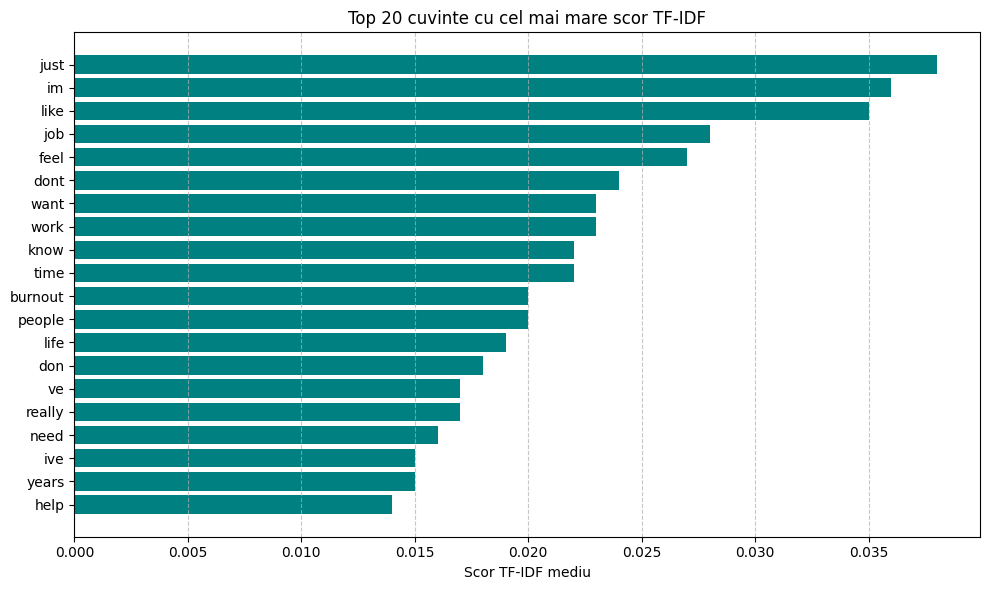

In [12]:
# Afisam pentru vizualizare primele 3 cuvinte rezultate din TF-IDF

keywords = ['just', 'im', 'like']

for word in keywords:
    print(f"\n=== Linii care conțin: '{word}' ===")
    matches = df[df['clean_text'].str.contains(fr'\b{word}\b', case=False, na=False)]
    print(matches['clean_text'].to_string(index=False))

Streaming output truncated to the last 5000 lines.
using me to outlet their frustration and now im...
i am so frustrated in every way i am in my mid ...
i dont know anymore i dont know really i dont k...
advice on how not to spiral hi i hope this is c...
my life i dont know what to do anymore i feel l...
idek for the past month ive been selfharming bu...
the thoughts are getting stronger dont know wha...
sudden deep depression that i cannot link to an...
i dont give a shit about anything i dont give a...
i need your help please i always feel depressed...
summer seasonal affective disorder 56 month dep...
suicidal ideation im not going to do it i would...
i feel invalid ever since i can remember ive be...
i am miserable garbage all i have done is creat...
how to tell someone i trust im depressed ive ha...
this is a stupid question but im trying not to ...
i want to go to sleep and never wake up again j...
feeling like time is up lately ive been having ...
fuck it im really not sure why 


=== NOUN ===


,Cuvânt,Scor TF-IDF
0,job,0.026
1,time,0.020
2,people,0.020
3,life,0.018
4,day,0.014
5,years,0.014
6,burnout,0.013
7,jobs,0.012
8,things,0.011
9,depression,0.011



=== VERB ===


,Cuvânt,Scor TF-IDF
0,feel,0.025
1,work,0.022
2,dont,0.021
3,want,0.021
4,know,0.020
5,ve,0.014
6,got,0.014
7,need,0.013
8,going,0.013
9,think,0.013



=== ADJ ===


,Cuvânt,Scor TF-IDF
0,good,0.012
1,new,0.010



=== ADV ===


,Cuvânt,Scor TF-IDF
0,just,0.036
1,really,0.016
2,better,0.010



=== PROPN ===


,Cuvânt,Scor TF-IDF
0,don,0.016
1,j2,0.010



=== OTHER ===


,Cuvânt,Scor TF-IDF
0,like,0.032
1,im,0.030
2,oe,0.014
3,ive,0.013
4,right,0.009


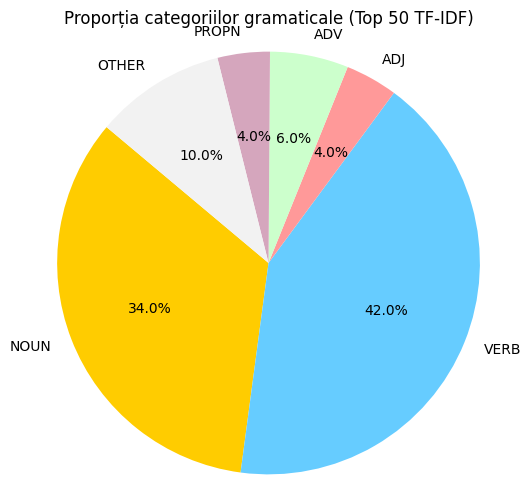

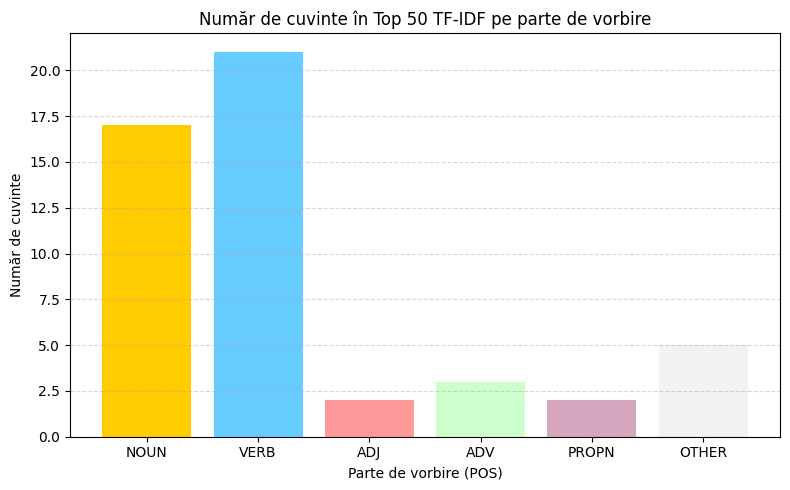

In [13]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
import matplotlib.pyplot as plt
from IPython.display import display

#  TF-IDF
tfidf = TfidfVectorizer(max_df=0.95, min_df=10, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['clean_text'])
tfidf_feature_names = tfidf.get_feature_names_out()

# Top 50 cuvinte
avg_tfidf = np.asarray(tfidf_matrix.mean(axis=0)).flatten()
top_indices = avg_tfidf.argsort()[-50:][::-1]
top_words = [(tfidf_feature_names[i], round(avg_tfidf[i], 3)) for i in top_indices]

# SpaCy POS tagging
nlp = spacy.load("en_core_web_sm")
word_groups = {"NOUN": [], "VERB": [], "ADJ": [], "ADV": [], "PROPN": [], "OTHER": []}

for word, score in top_words:
    doc = nlp(word)
    pos = doc[0].pos_ if doc else "OTHER"
    if pos not in word_groups:
        pos = "OTHER"
    word_groups[pos].append((word, score))

for pos_tag, words in word_groups.items():
    if words:
        print(f"\n=== {pos_tag} ===")
        df_pos = pd.DataFrame(words, columns=["Cuvânt", "Scor TF-IDF"])
        display(df_pos)

pos_labels = []
pos_counts = []

for pos, words in word_groups.items():
    if words:
        pos_labels.append(pos)
        pos_counts.append(len(words))

colors = {
    "NOUN": "#ffcc00",
    "VERB": "#66ccff",
    "ADJ": "#ff9999",
    "ADV": "#ccffcc",
    "PROPN": "#d5a6bd",
    "OTHER": "#f2f2f2"
}
color_list = [colors.get(pos, "#dddddd") for pos in pos_labels]

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(pos_counts, labels=pos_labels, autopct='%1.1f%%', startangle=140, colors=color_list)
plt.title("Proporția categoriilor gramaticale (Top 50 TF-IDF)")
plt.axis('equal')
plt.show()

# Bar chart
plt.figure(figsize=(8, 5))
plt.bar(pos_labels, pos_counts, color=color_list)
plt.title("Număr de cuvinte în Top 50 TF-IDF pe parte de vorbire")
plt.xlabel("Parte de vorbire (POS)")
plt.ylabel("Număr de cuvinte")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


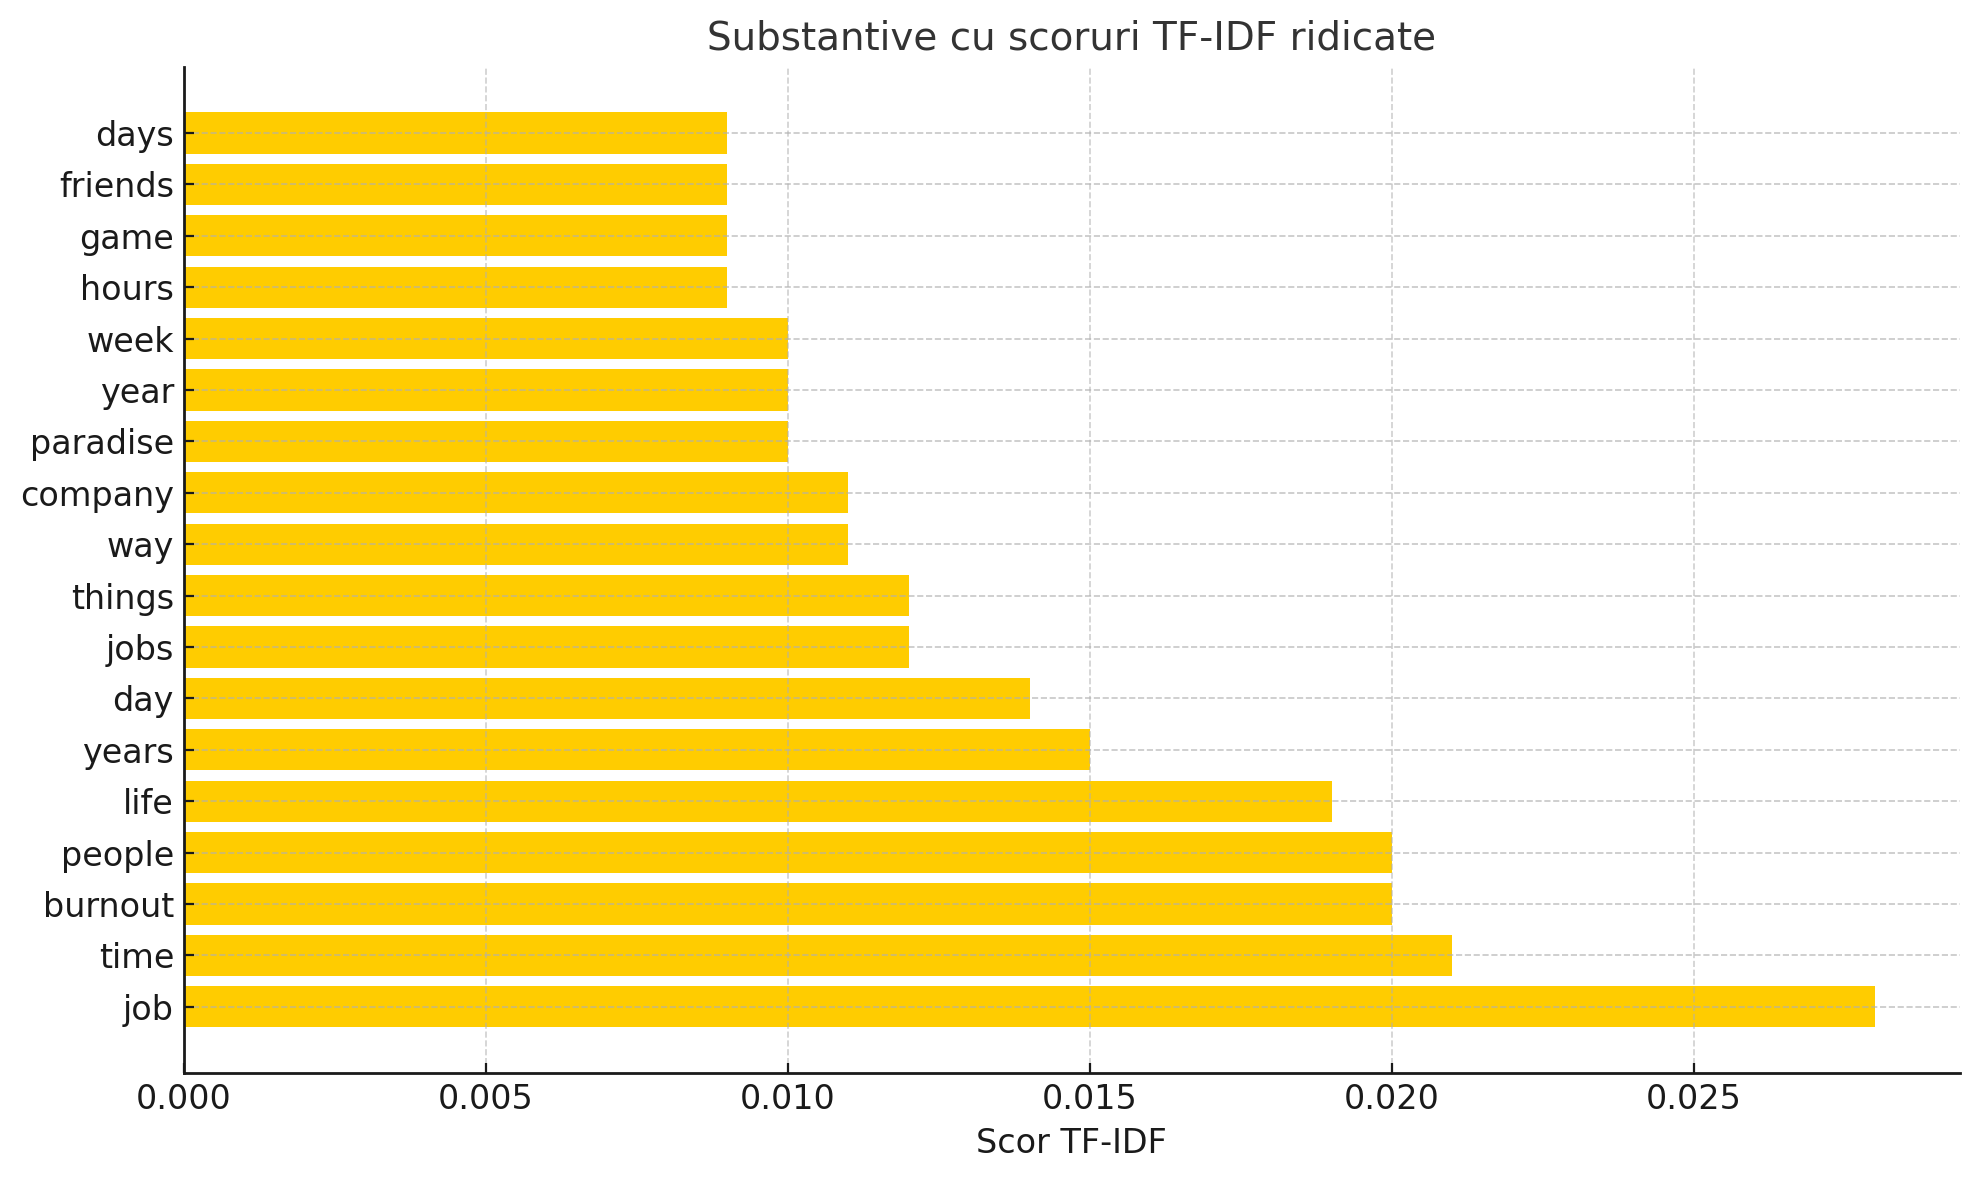

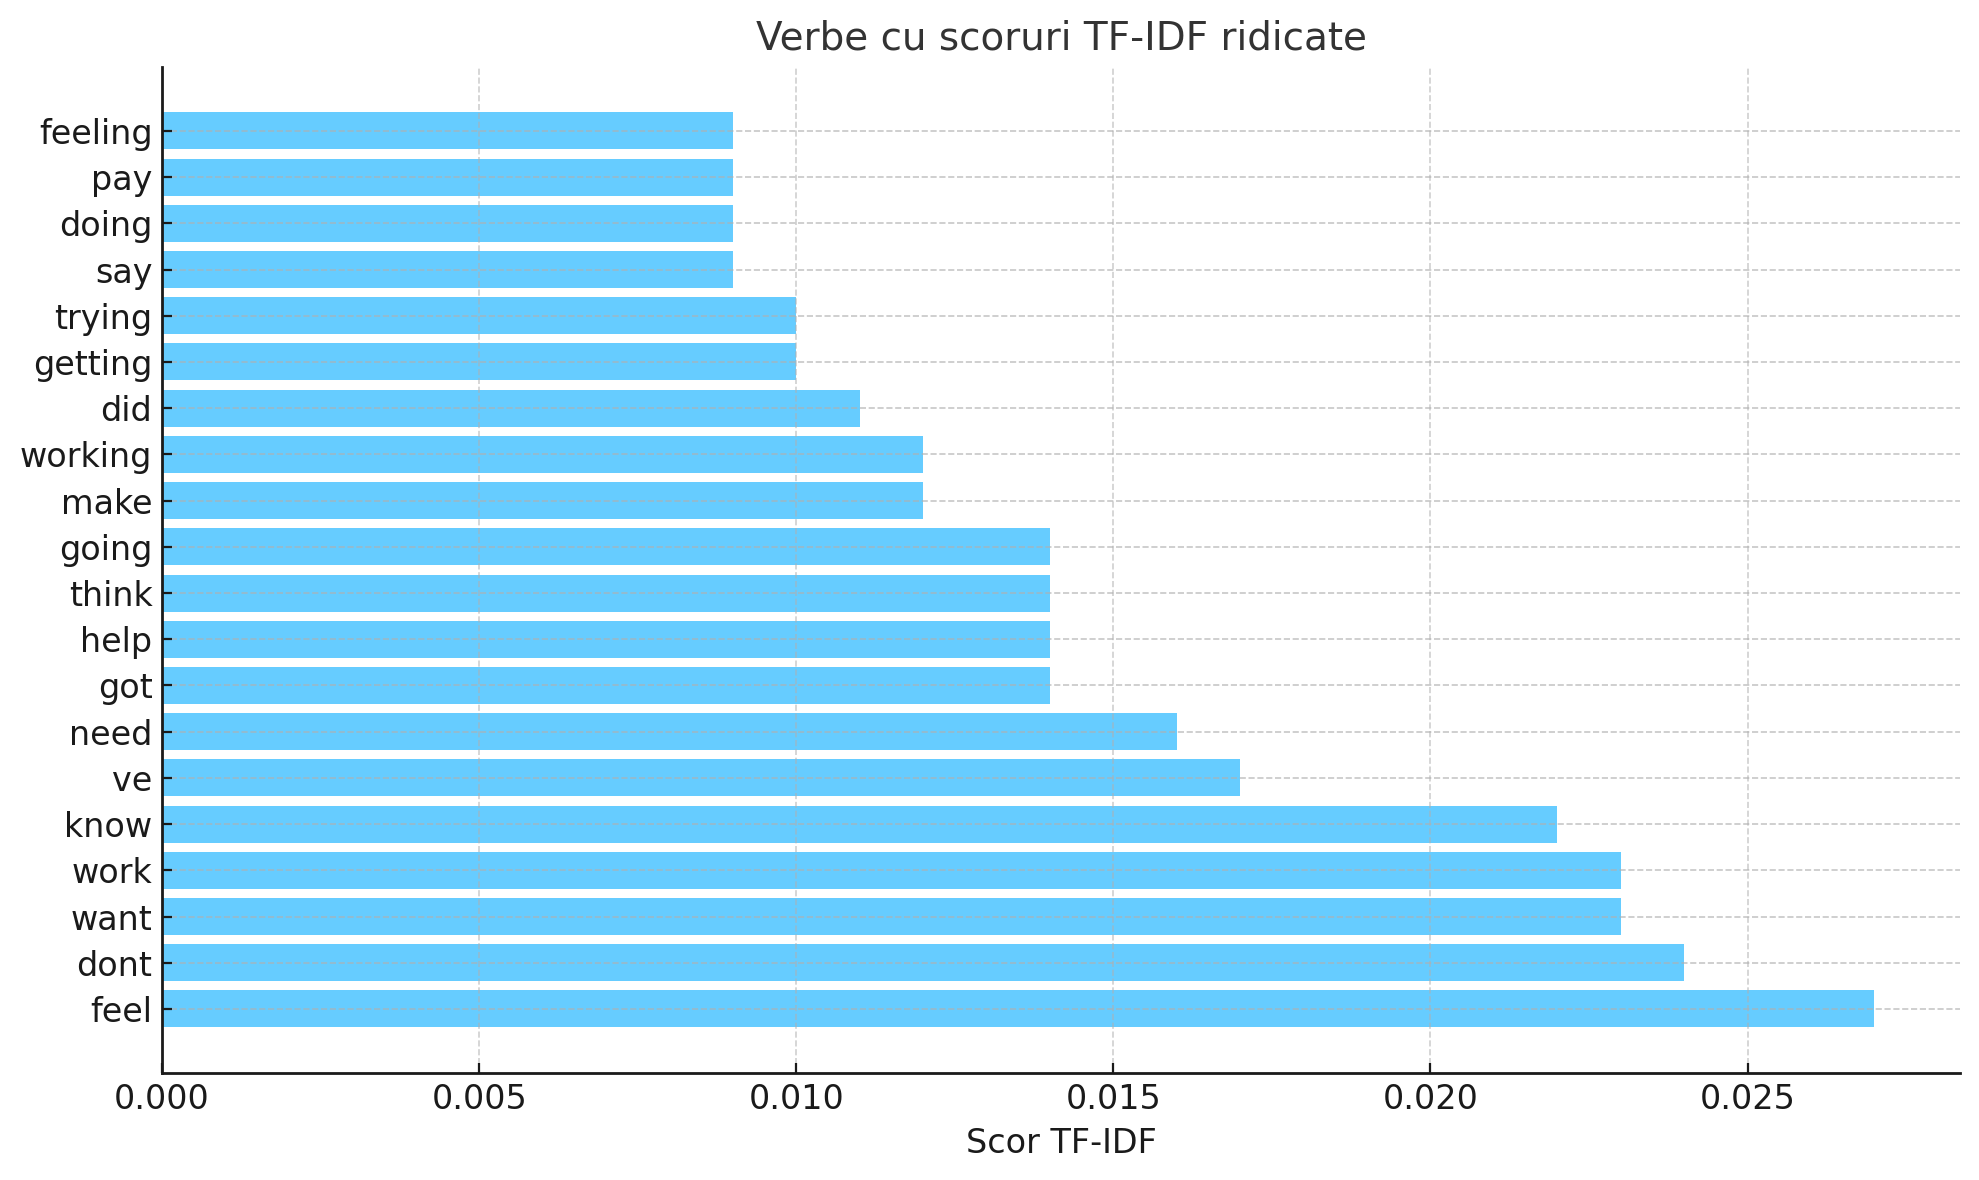

Analiză POS: 100%|██████████| 5112/5112 [00:29<00:00, 172.34it/s]


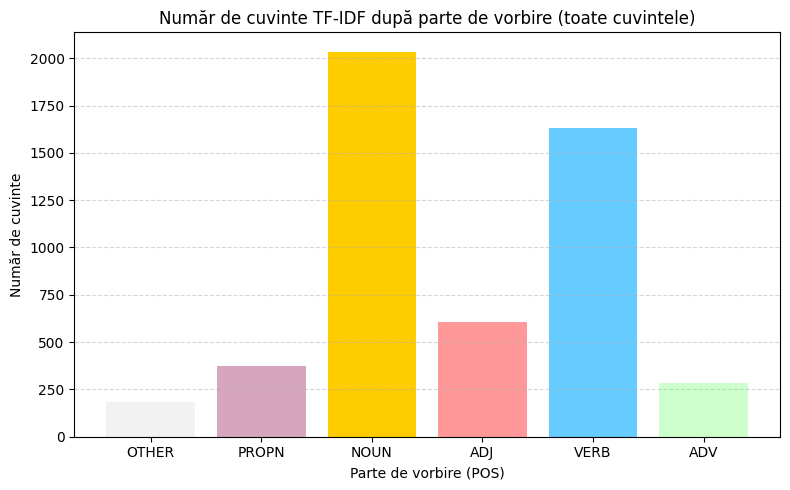

In [14]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
import matplotlib.pyplot as plt
from collections import defaultdict
from tqdm import tqdm

# Initializare SpaCy & TF-IDF
nlp = spacy.load("en_core_web_sm")
tfidf = TfidfVectorizer(max_df=0.95, min_df=10, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['clean_text'])
feature_names = tfidf.get_feature_names_out()

# Clasificare pe parti de vorbire (default)
pos_counts = defaultdict(int)

for word in tqdm(feature_names, desc="Analiză POS"):
    doc = nlp(word)
    pos = doc[0].pos_ if doc else "OTHER"
    if pos not in ["NOUN", "VERB", "ADJ", "ADV", "PROPN"]:
        pos = "OTHER"
    pos_counts[pos] += 1

labels = list(pos_counts.keys())
counts = [pos_counts[pos] for pos in labels]

colors = {
    "NOUN": "#ffcc00",
    "VERB": "#66ccff",
    "ADJ": "#ff9999",
    "ADV": "#ccffcc",
    "PROPN": "#d5a6bd",
    "OTHER": "#f2f2f2"
}
color_list = [colors.get(pos, "#dddddd") for pos in labels]

plt.figure(figsize=(8, 5))
plt.bar(labels, counts, color=color_list)
plt.title("Număr de cuvinte TF-IDF după parte de vorbire (toate cuvintele)")
plt.xlabel("Parte de vorbire (POS)")
plt.ylabel("Număr de cuvinte")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [15]:
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf_matrix)

# TOP 10 per Topic
def display_topics(model, feature_names, no_top_words):
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx+1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print()

display_topics(lda, tfidf_feature_names, 10)


Topic 1:
workers, billionaires, tax, america, healthcare, union, wage, bernie, american, rich

Topic 2:
job, work, oe, jobs, company, j2, just, j1, time, got

Topic 3:
just, like, feel, im, dont, life, want, know, people, don

Topic 4:
burnout, amazon, song, billion, dominator, greed, twn, bezos, city, verification

Topic 5:
burnout, game, revenge, car, crash, cars, playing, meme, true, series



In [16]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.8 MB/s eta 0:00:00


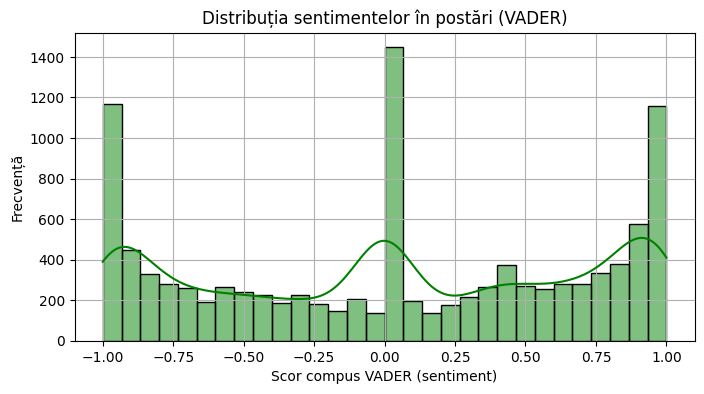

In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

analyzer = SentimentIntensityAnalyzer()

# Scorul facut de VADER
df['vader_sentiment'] = df['clean_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Histograma pentru distributia sentimentelor VADER
plt.figure(figsize=(8, 4))
sns.histplot(df['vader_sentiment'], bins=30, kde=True, color="green")
plt.title("Distribuția sentimentelor în postări (VADER)")
plt.xlabel("Scor compus VADER (sentiment)")
plt.ylabel("Frecvență")
plt.grid(True)
plt.show()

In [18]:
# Clasificare in 3 clase
def classify_sentiment(score):
    if score <= -0.05:
        return '1'
    elif score >= 0.05:
        return '-1'
    else:
        return '0'

df['burnout_label'] = df['vader_sentiment'].apply(classify_sentiment)


# vizualizare
df[['vader_sentiment', 'burnout_label']].sample(5)


,vader_sentiment,burnout_label
3341,0.9111,-1
10615,-0.2648,1
13752,0.6597,-1
8089,-0.7469,1
7456,-0.0672,1


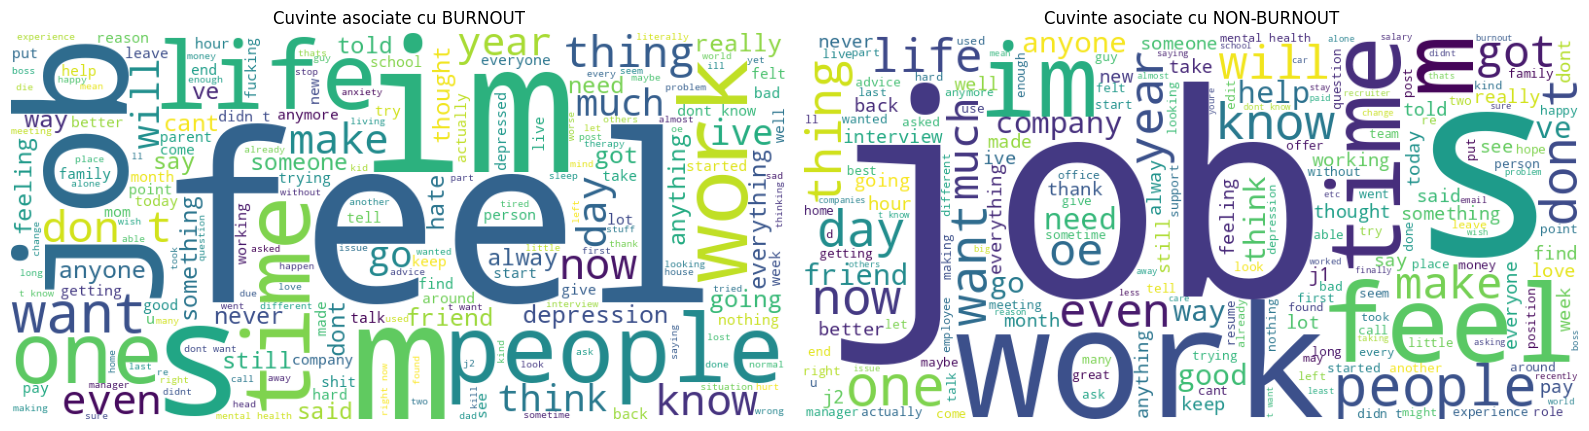

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Burnout
burnout_text = " ".join(df[df['burnout_label'] == '1']['clean_text'].values)

# Non-burnout: ('0' și '-1')
nonburnout_text = " ".join(df[df['burnout_label'] != '1']['clean_text'].values)

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].imshow(WordCloud(width=800, height=400, background_color='white').generate(burnout_text))
axs[0].axis('off')
axs[0].set_title("Cuvinte asociate cu BURNOUT")

axs[1].imshow(WordCloud(width=800, height=400, background_color='white').generate(nonburnout_text))
axs[1].axis('off')
axs[1].set_title("Cuvinte asociate cu NON-BURNOUT")

plt.tight_layout()
plt.show()


In [20]:
print("Exemple de postări POSIBILE cu burnout:")
print(df[df['burnout_label'] == '1']['clean_text'].sample(10, random_state=42))

print("\nExemple de postări NEUTRE:")
print(df[df['burnout_label'] == '0']['clean_text'].sample(10, random_state=42))

print("\nExemple de postări POZITIVE:")
print(df[df['burnout_label'] == '-1']['clean_text'].sample(10, random_state=42))


Exemple de postări POSIBILE cu burnout:
2534           burnout revenge is my favorite burnout game
13718    can we talk about how scary the world feels la...
15645    anyone else get these short waves of getting a...
6674     ab mere se dsa nhi hora sab bhool gya coding p...
8049     im sad i want do die i dont want to die my lif...
2670     burnout revenge players will easily understand...
10510    i tried killing myself yesterday i tried killi...
13374    billionaires paying millionaires to exploit th...
13632    tim walz isnt new to this in a 2008 speech on ...
15815    you can sound confident have anxiety you can l...
Name: clean_text, dtype: object

Exemple de postări NEUTRE:
11330    these billionaires are on one team and stick t...
13353                                   the workers plight
13603    for 40 years our countrys been going backward ...
16243    keep going you did not come this far just to c...
6817     whats the process of getting into jobs that pa...
6753     any wf

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Distribuția claselor:
burnout_label
-1    4921
1     4403
0     1497
Name: count, dtype: int64
Total samples: 10821

Train set size: 8656
Test set size: 2165

Accuratețea modelului: 0.6790 (67.90%)

Raportul de clasificare:
              precision    recall  f1-score   support

  Neutru (0)       0.69      0.74      0.72       985
 Burnout (1)       0.63      0.72      0.67       299
Pozitiv (-1)       0.69      0.59      0.64       881

    accuracy                           0.68      2165
   macro avg       0.67      0.69      0.67      2165
weighted avg       0.68      0.68      0.68      2165



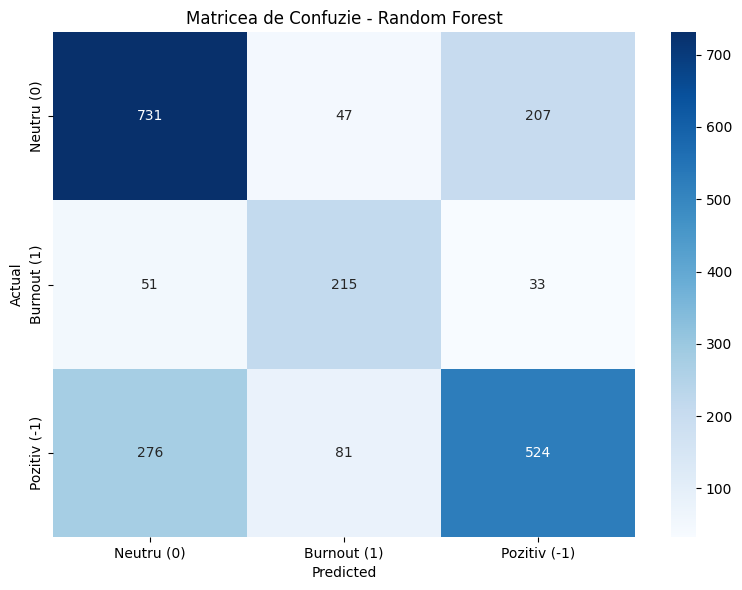


Top 20 cele mai importante cuvinte pentru predicție - feature-uri :
 1. like            - 0.0207
 2. just            - 0.0130
 3. good            - 0.0120
 4. depression      - 0.0108
 5. hate            - 0.0101
 6. love            - 0.0088
 7. feel            - 0.0082
 8. want            - 0.0082
 9. best            - 0.0078
10. im              - 0.0077
11. bad             - 0.0073
12. better          - 0.0071
13. time            - 0.0069
14. dont            - 0.0069
15. great           - 0.0065
16. help            - 0.0064
17. thank           - 0.0063
18. know            - 0.0060
19. revenge         - 0.0060
20. job             - 0.0058


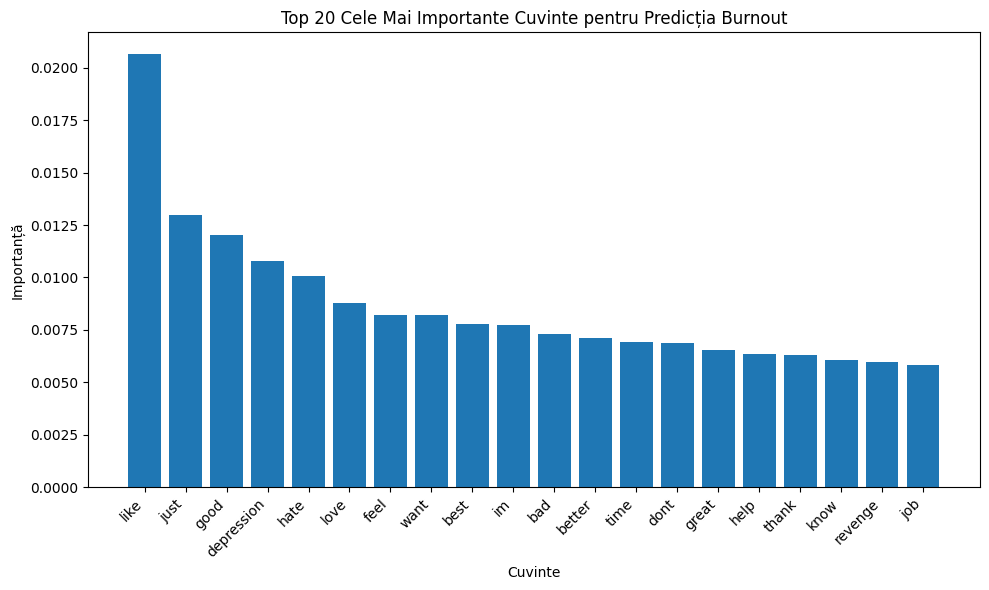

In [22]:
# X - matricea TF-IDF (features)
X = tfidf_matrix

# y - etichetele de burnout ('1', '0', '-1')
y = df['burnout_label']

print("Distribuția claselor:")
print(y.value_counts())
print(f"Total samples: {len(y)}")

# 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Initializare & antrenare
rf_classifier = RandomForestClassifier(
    n_estimators=290,
    max_depth=None,
    min_samples_split=6,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
    # class_weight='balanced'
)

rf_classifier.fit(X_train, y_train)

# Predictii
y_pred = rf_classifier.predict(X_test)

# Acuratetea
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuratețea modelului: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Raportul de clasificare detaliat
print("\nRaportul de clasificare:")
print(classification_report(y_test, y_pred,
                          target_names=['Neutru (0)', 'Burnout (1)', 'Pozitiv (-1)']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Neutru (0)', 'Burnout (1)', 'Pozitiv (-1)'],
            yticklabels=['Neutru (0)', 'Burnout (1)', 'Pozitiv (-1)'])
plt.title('Matricea de Confuzie - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Cele mai importante feature-uri
feature_importance = rf_classifier.feature_importances_
indices = np.argsort(feature_importance)[::-1][:20]

print("\nTop 20 cele mai importante cuvinte pentru predicție - feature-uri :")
for i, idx in enumerate(indices):
    print(f"{i+1:2d}. {tfidf_feature_names[idx]:15s} - {feature_importance[idx]:.4f}")

plt.figure(figsize=(10, 6))
plt.bar(range(20), [feature_importance[i] for i in indices])
plt.xticks(range(20), [tfidf_feature_names[i] for i in indices], rotation=45, ha='right')
plt.title('Top 20 Cele Mai Importante Cuvinte pentru Predicția Burnout')
plt.xlabel('Cuvinte')
plt.ylabel('Importanță')
plt.tight_layout()
plt.show()



def predict_burnout(text):
    """
    Funcție pentru a prezice dacă un text indică burnout
    """
    # Folosim functie de clean de mai sus
    clean_text_input = clean_text(text)

    # Transf. în TF-IDF
    text_tfidf = tfidf.transform([clean_text_input])

    # Predictie
    prediction = rf_classifier.predict(text_tfidf)[0]
    probability = rf_classifier.predict_proba(text_tfidf)[0]

    # Mapare clase
    class_mapping = {'0': 'Neutru', '1': 'Burnout', '-1': 'Pozitiv'}

    print(f"Text: {text[:100]}...")
    print(f"Predicție: {class_mapping[prediction]}")
    print(f"Probabilitati: Neutru={probability[0]:.3f}, Burnout={probability[1]:.3f}, Pozitiv={probability[2]:.3f}")

    return prediction, probability




In [23]:

test_texts = [
    "I'm so exhausted from work, I can't even think straight anymore. Everything feels overwhelming.",
    "Just got a promotion at work! Really excited about the new challenges ahead.",
    "Another boring day at the office, nothing special happened.",
    "I feel completely drained and burned out. Work is consuming my entire life and I have no energy left."
    # "Sometimes I feel tired after work, but I try to get enough rest and stay positive."
]

print("\n" + "="*60)
print("TESTE PE TEXTE NOI:")
print("="*60)

for i, text in enumerate(test_texts, 1):
    print(f"\nTest {i}:")
    predict_burnout(text)

# Statistici finale
print("\n" + "="*60)
print("STATISTICI FINALE:")
print("="*60)
print(f"Accuratețea generală: {accuracy*100:.2f}%")
print(f"Numărul total de features (cuvinte): {X.shape[1]}")
print(f"Numărul de arbori în Random Forest: {rf_classifier.n_estimators}")
print(f"Adâncimea maximă a arborilor: {rf_classifier.max_depth}")

# Performanta pe clasa
report_dict = classification_report(y_test, y_pred, output_dict=True)
class_mapping = {'0': 'Neutru (0)', '1': 'Burnout (1)', '-1': 'Pozitiv (-1)'}

print("\nPerformanta pe fiecare clasă:")
for class_label in np.unique(y):
    if class_label in report_dict:
        precision = report_dict[class_label]['precision']
        recall = report_dict[class_label]['recall']
        f1 = report_dict[class_label]['f1-score']
        support = report_dict[class_label]['support']
        class_name = class_mapping.get(class_label, f"Clasa {class_label}")
        print(f"{class_name}: Precision={precision:.3f}, Recall={recall:.3f}, F1-score={f1:.3f}, Support={support}")


TESTE PE TEXTE NOI:

Test 1:
Text: I'm so exhausted from work, I can't even think straight anymore. Everything feels overwhelming....
Predicție: Burnout
Probabilitati: Neutru=0.387, Burnout=0.150, Pozitiv=0.464

Test 2:
Text: Just got a promotion at work! Really excited about the new challenges ahead....
Predicție: Pozitiv
Probabilitati: Neutru=0.457, Burnout=0.198, Pozitiv=0.345

Test 3:
Text: Another boring day at the office, nothing special happened....
Predicție: Burnout
Probabilitati: Neutru=0.311, Burnout=0.301, Pozitiv=0.388

Test 4:
Text: I feel completely drained and burned out. Work is consuming my entire life and I have no energy left...
Predicție: Burnout
Probabilitati: Neutru=0.418, Burnout=0.133, Pozitiv=0.450

STATISTICI FINALE:
Accuratețea generală: 67.90%
Numărul total de features (cuvinte): 5112
Numărul de arbori în Random Forest: 290
Adâncimea maximă a arborilor: None

Performanta pe fiecare clasă:
Pozitiv (-1): Precision=0.691, Recall=0.742, F1-score=0.716, Support


Pornim GridSearchCV...
Fitting 3 folds for each of 81 candidates, totalling 243 fits

Cei mai buni hiperparametri găsiți:
{'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300}

Acuratețea finală pe test set:
Accuracy: 0.6781

Raport de clasificare:
              precision    recall  f1-score   support

  Neutru (0)       0.70      0.72      0.71       985
 Burnout (1)       0.62      0.79      0.70       299
Pozitiv (-1)       0.68      0.60      0.64       881

    accuracy                           0.68      2165
   macro avg       0.67      0.70      0.68      2165
weighted avg       0.68      0.68      0.68      2165



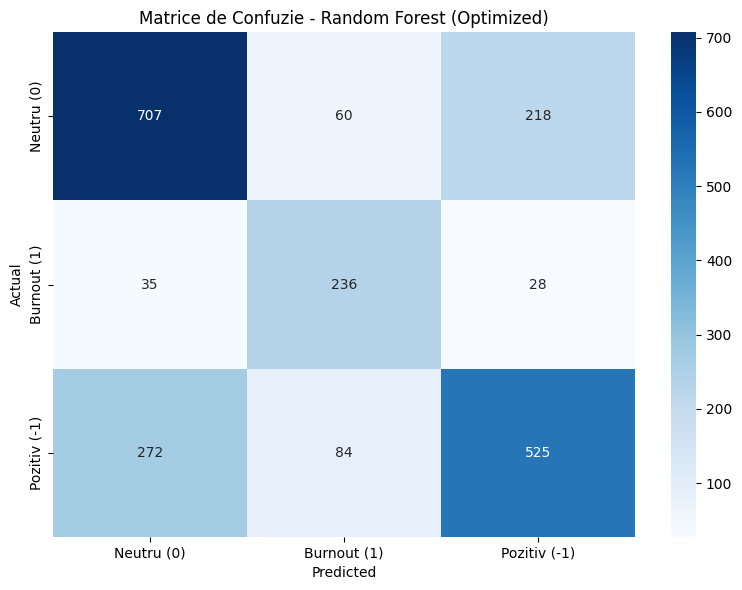

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Matricea TF-IDF și etichetele
X = tfidf_matrix
y = df['burnout_label']

# Împărțirea în train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Set de hiperparametri pentru Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

# Inițializare Random Forest
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Grid Search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,     # RUNDE
    scoring='f1_macro',  # Optimizăm pentru f1_macro, ca să ținem cont de toate clasele
    verbose=2,
    n_jobs=-1
)

print("\nPornim GridSearchCV...")
grid_search.fit(X_train, y_train)

# Cel mai bun model
best_rf = grid_search.best_estimator_

print("\nCei mai buni hiperparametri găsiți:")
print(grid_search.best_params_)

# Predicții pe test set
y_pred = best_rf.predict(X_test)

# Evaluare
print("\nAcuratețea finală pe test set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nRaport de clasificare:")
print(classification_report(y_test, y_pred, target_names=['Neutru (0)', 'Burnout (1)', 'Pozitiv (-1)']))

# Matricea de confuzie
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Neutru (0)', 'Burnout (1)', 'Pozitiv (-1)'],
            yticklabels=['Neutru (0)', 'Burnout (1)', 'Pozitiv (-1)'])
plt.title('Matrice de Confuzie - Random Forest (Optimized)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()



Pornim GridSearchCV...
Fitting 5 folds for each of 192 candidates, totalling 960 fits

Cei mai buni hiperparametri găsiți:
{'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 250}

Acuratețea finală pe test set:
Accuracy: 0.6693

Raport:
              precision    recall  f1-score   support

  Neutru (0)       0.71      0.70      0.70       985
 Burnout (1)       0.56      0.84      0.67       299
Pozitiv (-1)       0.68      0.58      0.63       881

    accuracy                           0.67      2165
   macro avg       0.65      0.70      0.67      2165
weighted avg       0.68      0.67      0.67      2165



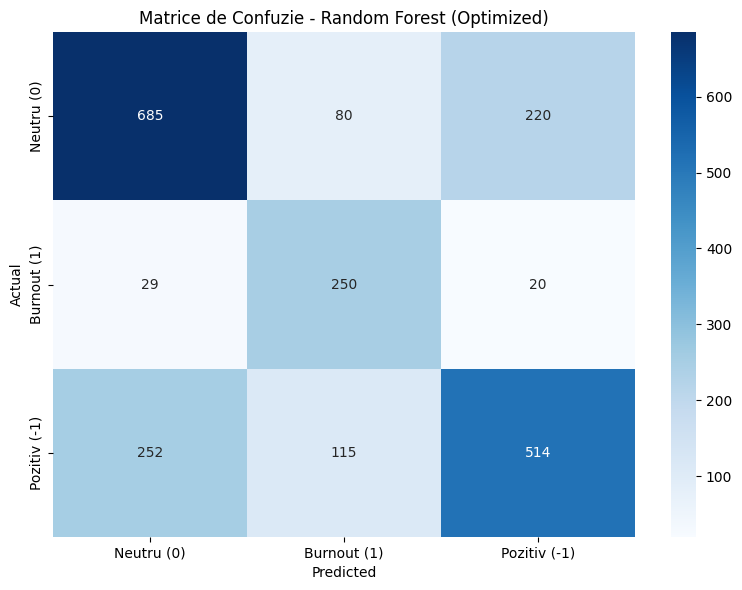

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Matrice TF-IDF
X = tfidf_matrix
y = df['burnout_label']

# 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Grid Search !!!
param_grid = {
    'n_estimators': [100, 200, 250, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3, 4],
    'class_weight': ['balanced']
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Grid Search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,     # RUNDE
    # scoring='f1_macro',  # optimizare -> tinem cont de toate clasele
    scoring='recall_macro',
    verbose=3,
    n_jobs=-1
)

print("\nPornim GridSearchCV...")
grid_search.fit(X_train, y_train)

# Cel mai bun model
best_rf = grid_search.best_estimator_

print("\nCei mai buni hiperparametri găsiți:")
print(grid_search.best_params_)

# Predictii
y_pred = best_rf.predict(X_test)

# Evaluare
print("\nAcuratețea finală pe test set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nRaport:")
print(classification_report(y_test, y_pred, target_names=['Neutru (0)', 'Burnout (1)', 'Pozitiv (-1)']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Neutru (0)', 'Burnout (1)', 'Pozitiv (-1)'],
            yticklabels=['Neutru (0)', 'Burnout (1)', 'Pozitiv (-1)'])
plt.title('Matrice de Confuzie - Random Forest (Optimized)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Matrice TF-IDF
X = tfidf_matrix
y = df['burnout_label']

# 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Grid Search !!!
param_grid = {
    'n_estimators': [150, 200, 250],
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3],
    'class_weight': ['balanced'],
    'max_features': ['sqrt', 'log2', None]    # !!!!
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Grid Search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,     # RUNDE
    # scoring='f1_macro',  # optimizare -> tinem cont de toate clasele
    scoring='recall_macro',
    verbose=3,
    n_jobs=-1
)

print("\nPornim GridSearchCV...")
grid_search.fit(X_train, y_train)

# Cel mai bun model
best_rf = grid_search.best_estimator_

print("\nCei mai buni hiperparametri găsiți:")
print(grid_search.best_params_)

# Predictii
y_pred = best_rf.predict(X_test)

# Evaluare
print("\nAcuratețea finală pe test set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nRaport:")
print(classification_report(y_test, y_pred, target_names=['Neutru (0)', 'Burnout (1)', 'Pozitiv (-1)']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Neutru (0)', 'Burnout (1)', 'Pozitiv (-1)'],
            yticklabels=['Neutru (0)', 'Burnout (1)', 'Pozitiv (-1)'])
plt.title('Matrice de Confuzie - Random Forest (Optimized)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()



Pornim GridSearchCV...
Fitting 5 folds for each of 72 candidates, totalling 360 fits


KeyboardInterrupt: 


Pornim RandomizedSearchCV...
Fitting 3 folds for each of 30 candidates, totalling 90 fits

Cei mai buni hiperparametri găsiți:
{'class_weight': 'balanced', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 273}

Acuratețea finală pe test set:
Accuracy: 0.6804

Raport:
              precision    recall  f1-score   support

  Neutru (0)       0.70      0.72      0.71       985
 Burnout (1)       0.62      0.78      0.69       299
Pozitiv (-1)       0.69      0.60      0.64       881

    accuracy                           0.68      2165
   macro avg       0.67      0.70      0.68      2165
weighted avg       0.68      0.68      0.68      2165



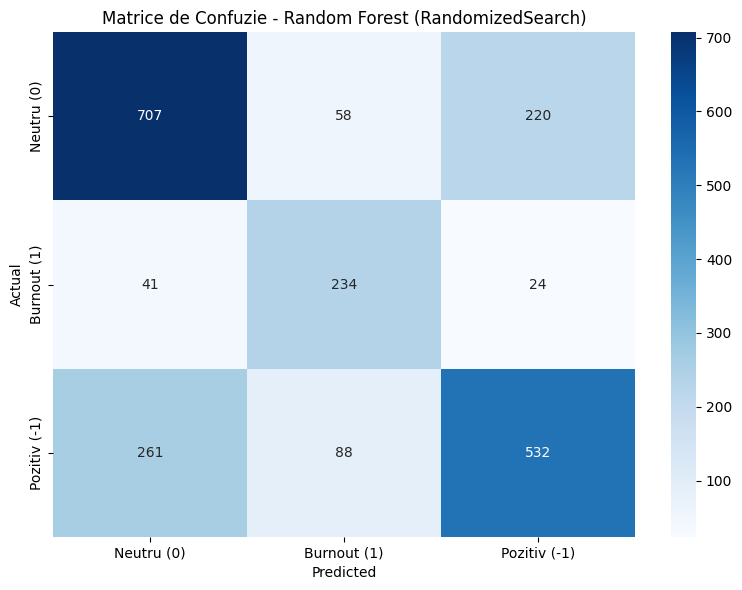

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import randint

# Matrice TF-IDF
X = tfidf_matrix
y = df['burnout_label']

# 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


param_dist = {
    'n_estimators': randint(150, 300),  # valori între 150 și 300
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3],
    'class_weight': ['balanced'],
    'max_features': ['sqrt', 'log2', None]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,
    cv=3,
    scoring='recall_macro',
    verbose=3,
    random_state=42,
    n_jobs=-1
)

print("\nPornim RandomizedSearchCV...")
random_search.fit(X_train, y_train)

# Cel mai bun model
best_rf = random_search.best_estimator_

print("\nCei mai buni hiperparametri găsiți:")
print(random_search.best_params_)

# Predictii
y_pred = best_rf.predict(X_test)

# Evaluare
print("\nAcuratețea finală pe test set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nRaport:")
print(classification_report(y_test, y_pred, target_names=['Neutru (0)', 'Burnout (1)', 'Pozitiv (-1)']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Neutru (0)', 'Burnout (1)', 'Pozitiv (-1)'],
            yticklabels=['Neutru (0)', 'Burnout (1)', 'Pozitiv (-1)'])
plt.title('Matrice de Confuzie - Random Forest (RandomizedSearch)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()
